# 1. Data structure of Pose Landmark Model in Mediapipe Holistic

In [3]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [4]:
#get the solutions of mediapipe
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

the results are <class 'numpy.ndarray'>


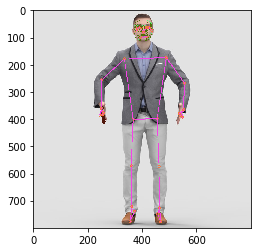

In [5]:
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Recolor Feed
    image = cv2.imread('Demo.jpg')
    image.flags.writeable = False

    # Make Detections
    results = holistic.process(image)
    

    # there are face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

    # Recolor image back to BGR for rendering
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # 1. Draw face landmarks
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )

    # 2. Right hand
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )

    # 3. Left Hand
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )

    # 4. Pose Detections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

    
    plt.imshow(image)
    print('the results are ' +str(type(image)))

- In Mediapipe Holistic, there are four minor models:
    - Face
    - Left hand
    - Right hand
    - Pose
- We decided to use Pose Landmark Model in the Gait recognition.
- Here is the details of the structure of the Pose Landmark Model.

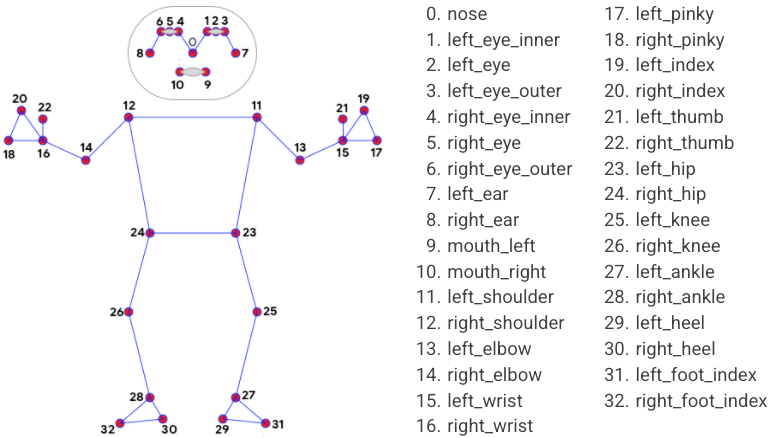

- Here is the result of the pose landmark:

In [6]:
results.pose_landmarks.landmark

[x: 0.506992518901825
y: 0.10201824456453323
z: -0.575115442276001
visibility: 0.9998875856399536
, x: 0.5189021229743958
y: 0.08117431402206421
z: -0.5432072281837463
visibility: 0.9996522665023804
, x: 0.5269415378570557
y: 0.08123625069856644
z: -0.5433387160301208
visibility: 0.9996399879455566
, x: 0.5348974466323853
y: 0.0819309651851654
z: -0.5434504747390747
visibility: 0.9996545314788818
, x: 0.495960533618927
y: 0.08141767233610153
z: -0.5428764224052429
visibility: 0.9996657371520996
, x: 0.4879801571369171
y: 0.08183908462524414
z: -0.5429581999778748
visibility: 0.9996826648712158
, x: 0.47975194454193115
y: 0.08269402384757996
z: -0.5430840253829956
visibility: 0.9997172951698303
, x: 0.5451029539108276
y: 0.09348773956298828
z: -0.32254263758659363
visibility: 0.9995394945144653
, x: 0.4725293219089508
y: 0.0960424542427063
z: -0.31939905881881714
visibility: 0.9996465444564819
, x: 0.522982120513916
y: 0.12288883328437805
z: -0.4908345937728882
visibility: 0.99981838464

In [9]:
len(results.pose_landmarks.landmark)

33

In [10]:
results.pose_landmarks.landmark[0]

x: 0.506992518901825
y: 0.10201824456453323
z: -0.575115442276001
visibility: 0.9998875856399536

In [8]:
33*4

132

- As we can see from the results, there are 33 groups number.

- In this case, from the results, there are 33 x 4 = 132 data for each pic 

# 2. Data compare

- there are two types of datasets from the CASIA Gait Recognition Dataset(http://www.cbsr.ia.ac.cn/users/szheng/?page_id=71).

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

- one of the Gait dataset is the normal data.

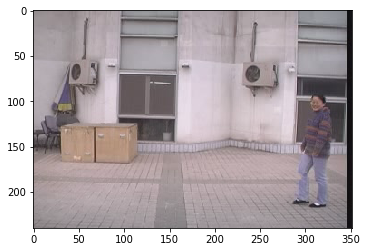

In [3]:
img1 = cv2.imread('Data_compare/00_1_normal/fyc-00_1-001.png')
img1 = img1[:, :, ::-1]#Change BRG to RGB, the original images are RGB
plt.imshow(img1)

- another of the Gait dataset is the silhouettes data.

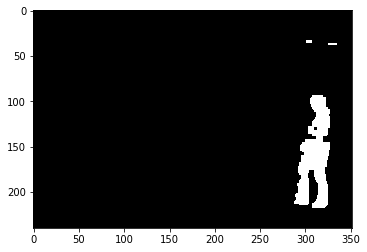

In [4]:
img1 = cv2.imread('Data_compare/00_1_silhouettes/fyc-00_1-001.png')
plt.imshow(img1)

- we will decide using the dataset which has a better performance with mediapipe.

### Read normal images with OpenCV.

In [13]:
count_nor = 0
file_pathname = 'Data_compare/fyc_normal/'
for filename in os.listdir(file_pathname):
    for filename_minor in os.listdir(file_pathname+filename+'/'):
        img = cv2.imread(file_pathname+filename+'/'+filename_minor)
        count_nor += 1
print('there are '+str(count_nor)+' images')

there are 1121 images


### Read silhouettes images with OpenCV.

In [14]:
count_sil = 0
file_pathname = 'Data_compare/fyc_silhouettes/'
for filename in os.listdir(file_pathname):
    for filename_minor in os.listdir(file_pathname+filename+'/'):
        img = cv2.imread(file_pathname+filename+'/'+filename_minor)
        count_sil += 1
print('there are '+str(count_sil)+' images')

there are 1121 images


- we choose two groups of images which from the same person and have the same angle of identification. 

- silhouettes images are processed by normal images.

### Normal images detection

In [15]:
#get the normal files
file_pathname = 'Data_compare/fyc_normal/'

In [16]:
detec_count_nor = 0
# Initiate holistic model
with mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for filename in os.listdir(file_pathname):
        for filename_minor in os.listdir(file_pathname+filename+'/'):
            image = cv2.imread(file_pathname+filename+'/'+filename_minor)
            # Convert the BGR image to RGB and process it with MediaPipe Pose.
            results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

            # Recolor image back to BGR for rendering
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 1. Draw face landmarks
            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                     mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                     )

            #2. Right hand
            mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                     )

            # 3. Left Hand
            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                     )

            # 4. Pose Detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                     )

            try:
                # Extract Pose landmarks
                pose = results.pose_landmarks.landmark

                #count the numbers
                detec_count_nor +=1
            except:
                pass

            cv2.imshow('normal_images', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break


cv2.destroyAllWindows()
print('there are '+str(detec_count_nor)+ ' images which can be detect')

there are 999 images which can be detect


### Silhouettes images detection

In [17]:
#get the silhouettes files
file_pathname = 'Data_compare/fyc_silhouettes/'

In [18]:
detec_count_sil = 0
# Initiate holistic model
with mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for filename in os.listdir(file_pathname):
        for filename_minor in os.listdir(file_pathname+filename+'/'):
            image = cv2.imread(file_pathname+filename+'/'+filename_minor)
            # Convert the BGR image to RGB and process it with MediaPipe Pose.
            results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

            # Recolor image back to BGR for rendering
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 1. Draw face landmarks
            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                     mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                     )

            #2. Right hand
            mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                     )

            # 3. Left Hand
            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                     )

            # 4. Pose Detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                     )

            try:
                # Extract Pose landmarks
                pose = results.pose_landmarks.landmark
                
                #count the numbers
                detec_count_sil +=1
                
                
            except:
                pass

            cv2.imshow('normal_images', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break


cv2.destroyAllWindows()
print('there are '+str(detec_count_sil)+ ' images which can be detect')

there are 3 images which can be detect


In [19]:
import matplotlib.pyplot as plt

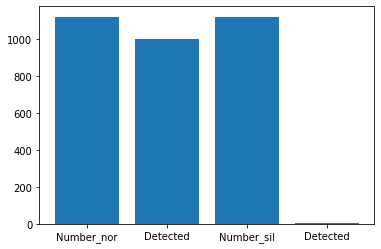

In [20]:
num_list = [count_nor, detec_count_nor,count_sil,detec_count_sil]
name_list = ['Number_nor','Detected','Number_sil','Detected']
plt.bar(range(len(num_list)), num_list, tick_label=name_list)  
plt.show() 

In [21]:
num_list

[1121, 999, 1121, 3]

In [22]:
acc_nor = detec_count_nor/count_nor
acc_sil = detec_count_sil/count_sil

In [23]:
print('Detection accuracy of normal images: '+ str(acc_nor*100)+'%')
print('Detection accuracy of silhouettes images: '+ str(acc_sil*100)+'%')

Detection accuracy of normal images: 89.11685994647635%
Detection accuracy of silhouettes images: 0.2676181980374665%


- as we can see from the results of detection, the normal dataset got the better performence.

# 3. Capture Landmarks & Export to CSV

In [44]:
import pandas as pd
import csv

- before export to csv, we have to figure out the structure of the pose landmarks

the results are <class 'numpy.ndarray'>


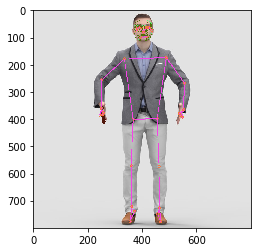

In [25]:
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Recolor Feed
    image = cv2.imread('Demo.jpg')
    image.flags.writeable = False

    # Make Detections
    results = holistic.process(image)
    

    # there are face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

    # Recolor image back to BGR for rendering
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # 1. Draw face landmarks
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )

    # 2. Right hand
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )

    # 3. Left Hand
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )

    # 4. Pose Detections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

    
    plt.imshow(image)
    print('the results are ' +str(type(image)))

In [26]:
results.pose_landmarks.landmark

[x: 0.506992518901825
y: 0.10201824456453323
z: -0.575115442276001
visibility: 0.9998875856399536
, x: 0.5189021229743958
y: 0.08117431402206421
z: -0.5432072281837463
visibility: 0.9996522665023804
, x: 0.5269415378570557
y: 0.08123625069856644
z: -0.5433387160301208
visibility: 0.9996399879455566
, x: 0.5348974466323853
y: 0.0819309651851654
z: -0.5434504747390747
visibility: 0.9996545314788818
, x: 0.495960533618927
y: 0.08141767233610153
z: -0.5428764224052429
visibility: 0.9996657371520996
, x: 0.4879801571369171
y: 0.08183908462524414
z: -0.5429581999778748
visibility: 0.9996826648712158
, x: 0.47975194454193115
y: 0.08269402384757996
z: -0.5430840253829956
visibility: 0.9997172951698303
, x: 0.5451029539108276
y: 0.09348773956298828
z: -0.32254263758659363
visibility: 0.9995394945144653
, x: 0.4725293219089508
y: 0.0960424542427063
z: -0.31939905881881714
visibility: 0.9996465444564819
, x: 0.522982120513916
y: 0.12288883328437805
z: -0.4908345937728882
visibility: 0.99981838464

In [27]:
num_coords = len(results.pose_landmarks.landmark)
num_coords

33

In [37]:
results.pose_landmarks.landmark[0]

x: 0.506992518901825
y: 0.10201824456453323
z: -0.575115442276001
visibility: 0.9998875856399536

- As we can see, one pose landmark has for numbers: x, y, z, visibility.

- x and y: Landmark coordinates normalized to [0.0, 1.0] by the image width and height respectively.

- z: Represents the landmark depth with the depth at the midpoint of hips being the origin, and the smaller the value the closer the landmark is to the camera. The magnitude of z uses roughly the same scale as x.
- visibility: A value in [0.0, 1.0] indicating the likelihood of the landmark being visible (present and not occluded) in the image.

- In this case, we decided to set a structure for thoese data.

In [42]:
landmarks = ['Class']
for val in range(1, num_coords+1):
    landmarks +=['x{}'.format(val), 'y{}'.format(val), 
                 'z{}'.format(val), 'v{}'.format(val)]
pd.Series(landmarks)

0      Class
1         x1
2         y1
3         z1
4         v1
       ...  
128      v32
129      x33
130      y33
131      z33
132      v33
Length: 133, dtype: object

In [39]:
len(landmarks)

133

- Finally, we scale all 132 pieces of data into a row vector then plus the class name as the lable.
- Each image will be viewed as a (1 x 133) vector.

- we save this structure as a CSV.

In [46]:
with open('Data_coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [47]:
df = pd.read_csv('Data_coords.csv')

In [48]:
pd.DataFrame(df)

,Class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33


### Gain coords from different people

- we should set the class name first, then we have to select the corresponding folder to input data against the class name.

In [56]:
ls

 驱动器 C 中的卷是 OS
 卷的序列号是 92C6-1DBA

 C:\Users\huhon\Desktop\Artificial Intelligence\project\Code\Data 的目录

2021/08/12  18:08    <DIR>          .
2021/08/12  18:08    <DIR>          ..
2021/08/12  18:07    <DIR>          fyc
2021/08/12  18:07    <DIR>          hy
2021/08/12  18:07    <DIR>          ljg
2021/08/12  18:07    <DIR>          lqf
2021/08/12  18:07    <DIR>          lsl
2021/08/12  18:07    <DIR>          member_photo
2021/08/12  18:07    <DIR>          ml
2021/08/12  18:07    <DIR>          nhz
2021/08/12  18:07    <DIR>          rj
2021/08/12  18:07    <DIR>          syj
2004/03/16  07:27         2,027,712 u.mat
2021/08/12  18:07    <DIR>          video
2021/08/12  18:07    <DIR>          wl
2021/08/12  18:07    <DIR>          wq
2021/08/12  18:07    <DIR>          wyc
2021/08/12  18:07    <DIR>          xch
2021/08/12  18:07    <DIR>          xxj
2021/08/12  18:08    <DIR>          yjf
2021/08/12  18:08    <DIR>          zc
2021/08/12  18:08    <DIR>          zdx
2021/08/12 

- The dataset is from 20 people, and each of them has the same camera Angle.

In [59]:
cd fyc

C:\Users\huhon\Desktop\Artificial Intelligence\project\Code\Data\fyc


In [60]:
ls

 驱动器 C 中的卷是 OS
 卷的序列号是 92C6-1DBA

 C:\Users\huhon\Desktop\Artificial Intelligence\project\Code\Data\fyc 的目录

2021/08/12  18:07    <DIR>          .
2021/08/12  18:07    <DIR>          ..
2021/08/12  18:07    <DIR>          00_1
2021/08/12  18:07    <DIR>          00_2
2021/08/12  18:07    <DIR>          00_3
2021/08/12  18:07    <DIR>          00_4
2021/08/12  18:07    <DIR>          45_1
2021/08/12  18:07    <DIR>          45_2
2021/08/12  18:07    <DIR>          45_3
2021/08/12  18:07    <DIR>          45_4
2021/08/12  18:07    <DIR>          90_1
2021/08/12  18:07    <DIR>          90_2
2021/08/12  18:07    <DIR>          90_3
2021/08/12  18:07    <DIR>          90_4
               0 个文件              0 字节
              14 个目录 77,078,351,872 可用字节


In [63]:
cd ..

C:\Users\huhon\Desktop\Artificial Intelligence\project\Code


In [64]:
class_name = "zyf"
file_pathname = 'Data/zyf/'

In [66]:
count = 0
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for filename in os.listdir(file_pathname):
        for filename_minor in os.listdir(file_pathname+filename+'/'):
            
            image = cv2.imread(file_pathname+filename+'/'+filename_minor)
            # Convert the BGR image to RGB and process it with MediaPipe Pose.
            results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            

            # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

            # Recolor image back to BGR for rendering
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Pose Detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                     )

            try:
                # Extract Pose landmarks
                pose = results.pose_landmarks.landmark
                pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())


                # Concate rows
                row = pose_row

                # Append class name 
                row.insert(0, class_name)

                # Export to CSV
                with open('Data_coords.csv', mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row) 

                count +=1
            except:
                pass

            cv2.imshow('Images', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

#Close the windows
cv2.destroyAllWindows()
print('there are '+str(count)+ ' images have been detected')

there are 945 images have been detected


- In order to prevent misoperation, we make a copy of Data_coords.csv and rename it to Data_coords_20.csv, and then use the copied file.

In [67]:
pd.read_csv('Data_coords.csv')

,Class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,fyc,0.879743,0.434765,-0.110076,0.998767,0.884691,0.423257,-0.112526,0.998340,0.887720,...,0.163869,0.858926,0.875535,0.894358,-0.074822,0.946482,0.815601,0.877874,0.101090,0.892224
1,fyc,0.875687,0.434991,-0.121108,0.998882,0.881445,0.424194,-0.120181,0.998495,0.884622,...,0.164102,0.858729,0.871622,0.894546,-0.070210,0.946372,0.789716,0.876701,0.109292,0.890800
2,fyc,0.865430,0.436499,-0.147009,0.998986,0.870713,0.426487,-0.145864,0.998635,0.873895,...,0.142747,0.857340,0.871901,0.894528,0.004848,0.945344,0.760859,0.870030,0.086790,0.892033
3,fyc,0.855601,0.439941,-0.162105,0.999083,0.861209,0.430437,-0.159268,0.998765,0.864392,...,0.127017,0.856817,0.872124,0.894467,0.018772,0.942292,0.739511,0.865657,0.067528,0.893602
4,fyc,0.839366,0.441057,-0.165840,0.999171,0.846083,0.431095,-0.166450,0.998884,0.849447,...,0.138057,0.851298,0.872283,0.894467,0.035043,0.942063,0.735843,0.867225,0.077553,0.894663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19084,zyf,0.482226,0.352177,0.072488,0.999090,0.479214,0.347417,0.055533,0.998431,0.477319,...,0.021791,0.932058,0.471075,0.669711,0.032251,0.868960,0.493318,0.677998,-0.013290,0.863955
19085,zyf,0.482570,0.351507,0.071666,0.999083,0.479578,0.346604,0.054295,0.998416,0.477711,...,0.002978,0.935579,0.474237,0.670260,0.047835,0.872947,0.493696,0.673325,-0.033089,0.872157
19086,zyf,0.482691,0.350844,0.049965,0.999033,0.479861,0.346014,0.035424,0.998326,0.478057,...,0.014861,0.938204,0.473171,0.669987,0.044845,0.876245,0.492910,0.670024,-0.022132,0.879208
19087,zyf,0.482893,0.350550,0.076882,0.998906,0.480153,0.345540,0.062864,0.998147,0.478365,...,0.005521,0.940749,0.472804,0.667367,0.039189,0.876823,0.489885,0.665885,-0.027317,0.884802


In [68]:
pd.read_csv('Data_coords_20.csv')

,Class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,fyc,0.879743,0.434765,-0.110076,0.998767,0.884691,0.423257,-0.112526,0.998340,0.887720,...,0.163869,0.858926,0.875535,0.894358,-0.074822,0.946482,0.815601,0.877874,0.101090,0.892224
1,fyc,0.875687,0.434991,-0.121108,0.998882,0.881445,0.424194,-0.120181,0.998495,0.884622,...,0.164102,0.858729,0.871622,0.894546,-0.070210,0.946372,0.789716,0.876701,0.109292,0.890800
2,fyc,0.865430,0.436499,-0.147009,0.998986,0.870713,0.426487,-0.145864,0.998635,0.873895,...,0.142747,0.857340,0.871901,0.894528,0.004848,0.945344,0.760859,0.870030,0.086790,0.892033
3,fyc,0.855601,0.439941,-0.162105,0.999083,0.861209,0.430437,-0.159268,0.998765,0.864392,...,0.127017,0.856817,0.872124,0.894467,0.018772,0.942292,0.739511,0.865657,0.067528,0.893602
4,fyc,0.839366,0.441057,-0.165840,0.999171,0.846083,0.431095,-0.166450,0.998884,0.849447,...,0.138057,0.851298,0.872283,0.894467,0.035043,0.942063,0.735843,0.867225,0.077553,0.894663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19084,zyf,0.482226,0.352177,0.072488,0.999090,0.479214,0.347417,0.055533,0.998431,0.477319,...,0.021791,0.932058,0.471075,0.669711,0.032251,0.868960,0.493318,0.677998,-0.013290,0.863955
19085,zyf,0.482570,0.351507,0.071666,0.999083,0.479578,0.346604,0.054295,0.998416,0.477711,...,0.002978,0.935579,0.474237,0.670260,0.047835,0.872947,0.493696,0.673325,-0.033089,0.872157
19086,zyf,0.482691,0.350844,0.049965,0.999033,0.479861,0.346014,0.035424,0.998326,0.478057,...,0.014861,0.938204,0.473171,0.669987,0.044845,0.876245,0.492910,0.670024,-0.022132,0.879208
19087,zyf,0.482893,0.350550,0.076882,0.998906,0.480153,0.345540,0.062864,0.998147,0.478365,...,0.005521,0.940749,0.472804,0.667367,0.039189,0.876823,0.489885,0.665885,-0.027317,0.884802


In [69]:
df = pd.read_csv('Data_coords_20.csv')

In [73]:
df.groupby('Class')['Class'].value_counts()

Class  Class
fyc    fyc      1115
hy     hy       1000
ljg    ljg      1045
lqf    lqf      1050
lsl    lsl      1005
ml     ml        965
nhz    nhz      1026
rj     rj        883
syj    syj      1011
wl     wl        818
wq     wq        957
wyc    wyc       918
xch    xch       829
xxj    xxj      1016
yjf    yjf       934
zc     zc        839
zdx    zdx       891
zjg    zjg       985
zl     zl        857
zyf    zyf       945
Name: Class, dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19089 entries, 0 to 19088
Columns: 133 entries, Class to v33
dtypes: float64(132), object(1)
memory usage: 19.4+ MB


In [75]:
d = df.groupby('Class')['Class'].value_counts()

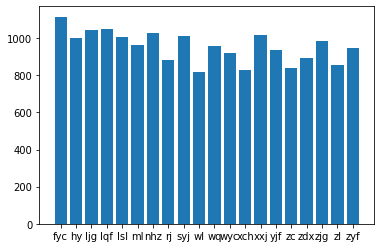

In [80]:
num_list = []
for i in d:
    num_list.append(i)
name_list = ['fyc','hy','ljg','lqf','lsl','ml','nhz','rj','syj','wl','wq','wyc','xch','xxj','yjf','zc','zdx','zjg','zl','zyf']
plt.bar(range(len(num_list)), num_list, tick_label=name_list)  
plt.show() 

- According to the results, the amount of data recorded by each person is not different, so the training can be assured.

In [5]:
19089/19139

0.9973875333089504